In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from tomo_encoders.structures.voids import Voids
import sys
import os
sys.path.append('/home/atekawade/TomoEncoders/scratchpad/voids_paper/bin/tests/')
from utils import voids_dir, time_logs, ply_dir
import pandas as pd

In [2]:
b_vals = [16,8,4]
voids = {}
sizes_um = {}
surf = {}
for b in b_vals:
    voids[b] = Voids().import_from_disk(os.path.join(voids_dir, "voids_b_%i"%b))
    sizes_um[b] = np.cbrt(voids[b]["sizes"])*b*1.17

<IPython.core.display.Javascript object>


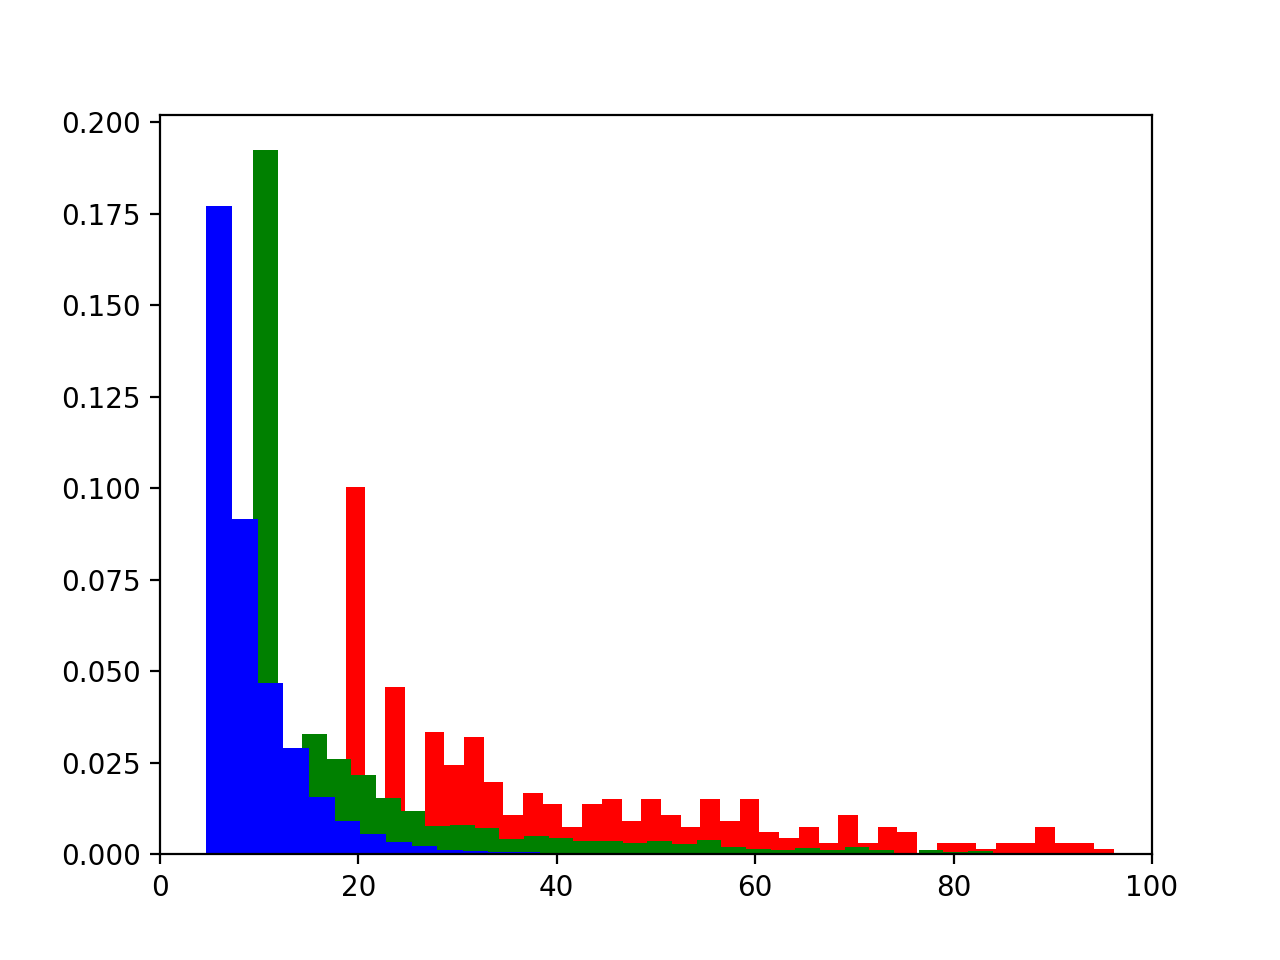

In [3]:
colors = ["red", "green", "blue"]
fig, ax = plt.subplots(1,1)
for ib, b in enumerate(b_vals):
    _ = ax.hist(sizes_um[b], bins = 100, color = colors[ib], density = True)
    ax.set_xlim([0,100])

In [4]:
for ib, b in enumerate(b_vals):
    print(f"[{min(sizes_um[b]):.2f}, {max(sizes_um[b]):.2f}]")

[18.72, 217.34]
[9.36, 257.93]
[4.68, 263.10]


In [5]:
for b in b_vals:
#     voids[b].marching_cubes_algo = "vedo"
#     surf = voids[b].export_void_mesh_with_texture("sizes")
    voids[b].marching_cubes_algo = "skimage"
    surf[b] = voids[b].export_void_mesh_with_texture("sizes")
    surf[b].write_ply(os.path.join(ply_dir, f"voids_b_{b}.ply"))

	TIME: compute void mesh 0.09 secs
	TIME: compute void mesh 0.66 secs
	TIME: compute void mesh 10.72 secs
